<a href="https://colab.research.google.com/github/rajitk13/csi-team-3-project/blob/main/TCC_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
df1= pd.read_csv('/content/drive/MyDrive/celebal internship/toxic comment classifier/train.csv')
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
df1.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


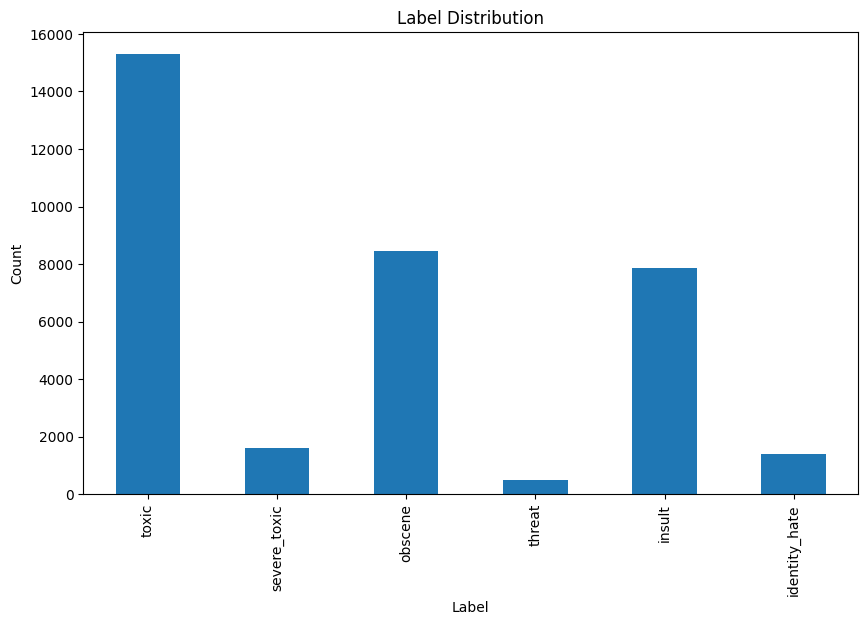

In [ ]:
label_counts = df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum()
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
comments = df1['comment_text']
labels = df1[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

In [ ]:
train_comments, val_comments, train_labels, val_labels = train_test_split(comments, labels, test_size=0.2, random_state=42)

In [ ]:
mnb_pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', MultinomialNB())
])

In [ ]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 1.0, 10.0]
}

In [ ]:
mnb_grid_search = GridSearchCV(mnb_pipeline, parameters, cv=5, n_jobs=-1)
for label in labels.columns:
    mnb_grid_search.fit(train_comments, train_labels[label])
    best_mnb_model = mnb_grid_search.best_estimator_
    val_predictions = best_mnb_model.predict(val_comments)
    print(f"Label: {label}")
    print(classification_report(val_labels[label], val_predictions))

Label: toxic
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     28859
           1       0.77      0.62      0.69      3056

    accuracy                           0.95     31915
   macro avg       0.87      0.80      0.83     31915
weighted avg       0.94      0.95      0.94     31915

Label: severe_toxic
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.52      0.24      0.33       321

    accuracy                           0.99     31915
   macro avg       0.75      0.62      0.66     31915
weighted avg       0.99      0.99      0.99     31915



KeyboardInterrupt: ignored

In [ ]:
from tqdm import tqdm
submission_df = pd.DataFrame({'id': submission_data['id']})
for label in tqdm(labels.columns):
    best_mnb_model.fit(comments, labels[label])
    label_submission = best_mnb_model.predict_proba(submission_comments)
    submission_df[label] = label_submission[:, 1]

submission_df.to_csv('submission.csv', index=False)